In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", "{:.2f}".format)
from sklearn.model_selection import train_test_split
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau_data = pd.read_csv("bureau_data.csv")

In [3]:
df_customers.shape,df_loans.shape,df_bureau_data.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [5]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df_bureau_data.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [7]:
df = pd.merge(df_customers,df_loans,on="cust_id")
df = pd.merge(df,df_bureau_data,on="cust_id")

df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df["default"]=df["default"].astype(int)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58


In [10]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
X = df.drop("default",axis=1)
y = df["default"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:

df_train = pd.concat([X_train,y_train],axis=1)
df_test  = pd.concat([X_test,y_test],axis=1)

In [13]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [14]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [17]:
df_train.fillna(mode_residence,inplace=True)
df_test.fillna(mode_residence,inplace=True)
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [18]:
df_train.isnull().sum().sum()

0

In [19]:
df_train.duplicated().sum()

0

In [20]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [21]:

columns_continuous = [
    "age","income","number_of_dependants", "years_at_current_address", "sanction_amount",
    "loan_amount", "processing_fee", "gst", "net_disbursement", "loan_tenure_months",
    "principal_outstanding", "bank_balance_at_application", "number_of_open_accounts",
    "number_of_closed_accounts", "total_loan_months", "delinquent_months",
    "total_dpd", "enquiry_count", "credit_utilization_ratio"
]

columns_categorical = [
    "gender", "marital_status", "employment_status", "residence_type", "city",
    "state", "zipcode", "loan_purpose", "loan_type","default",
]

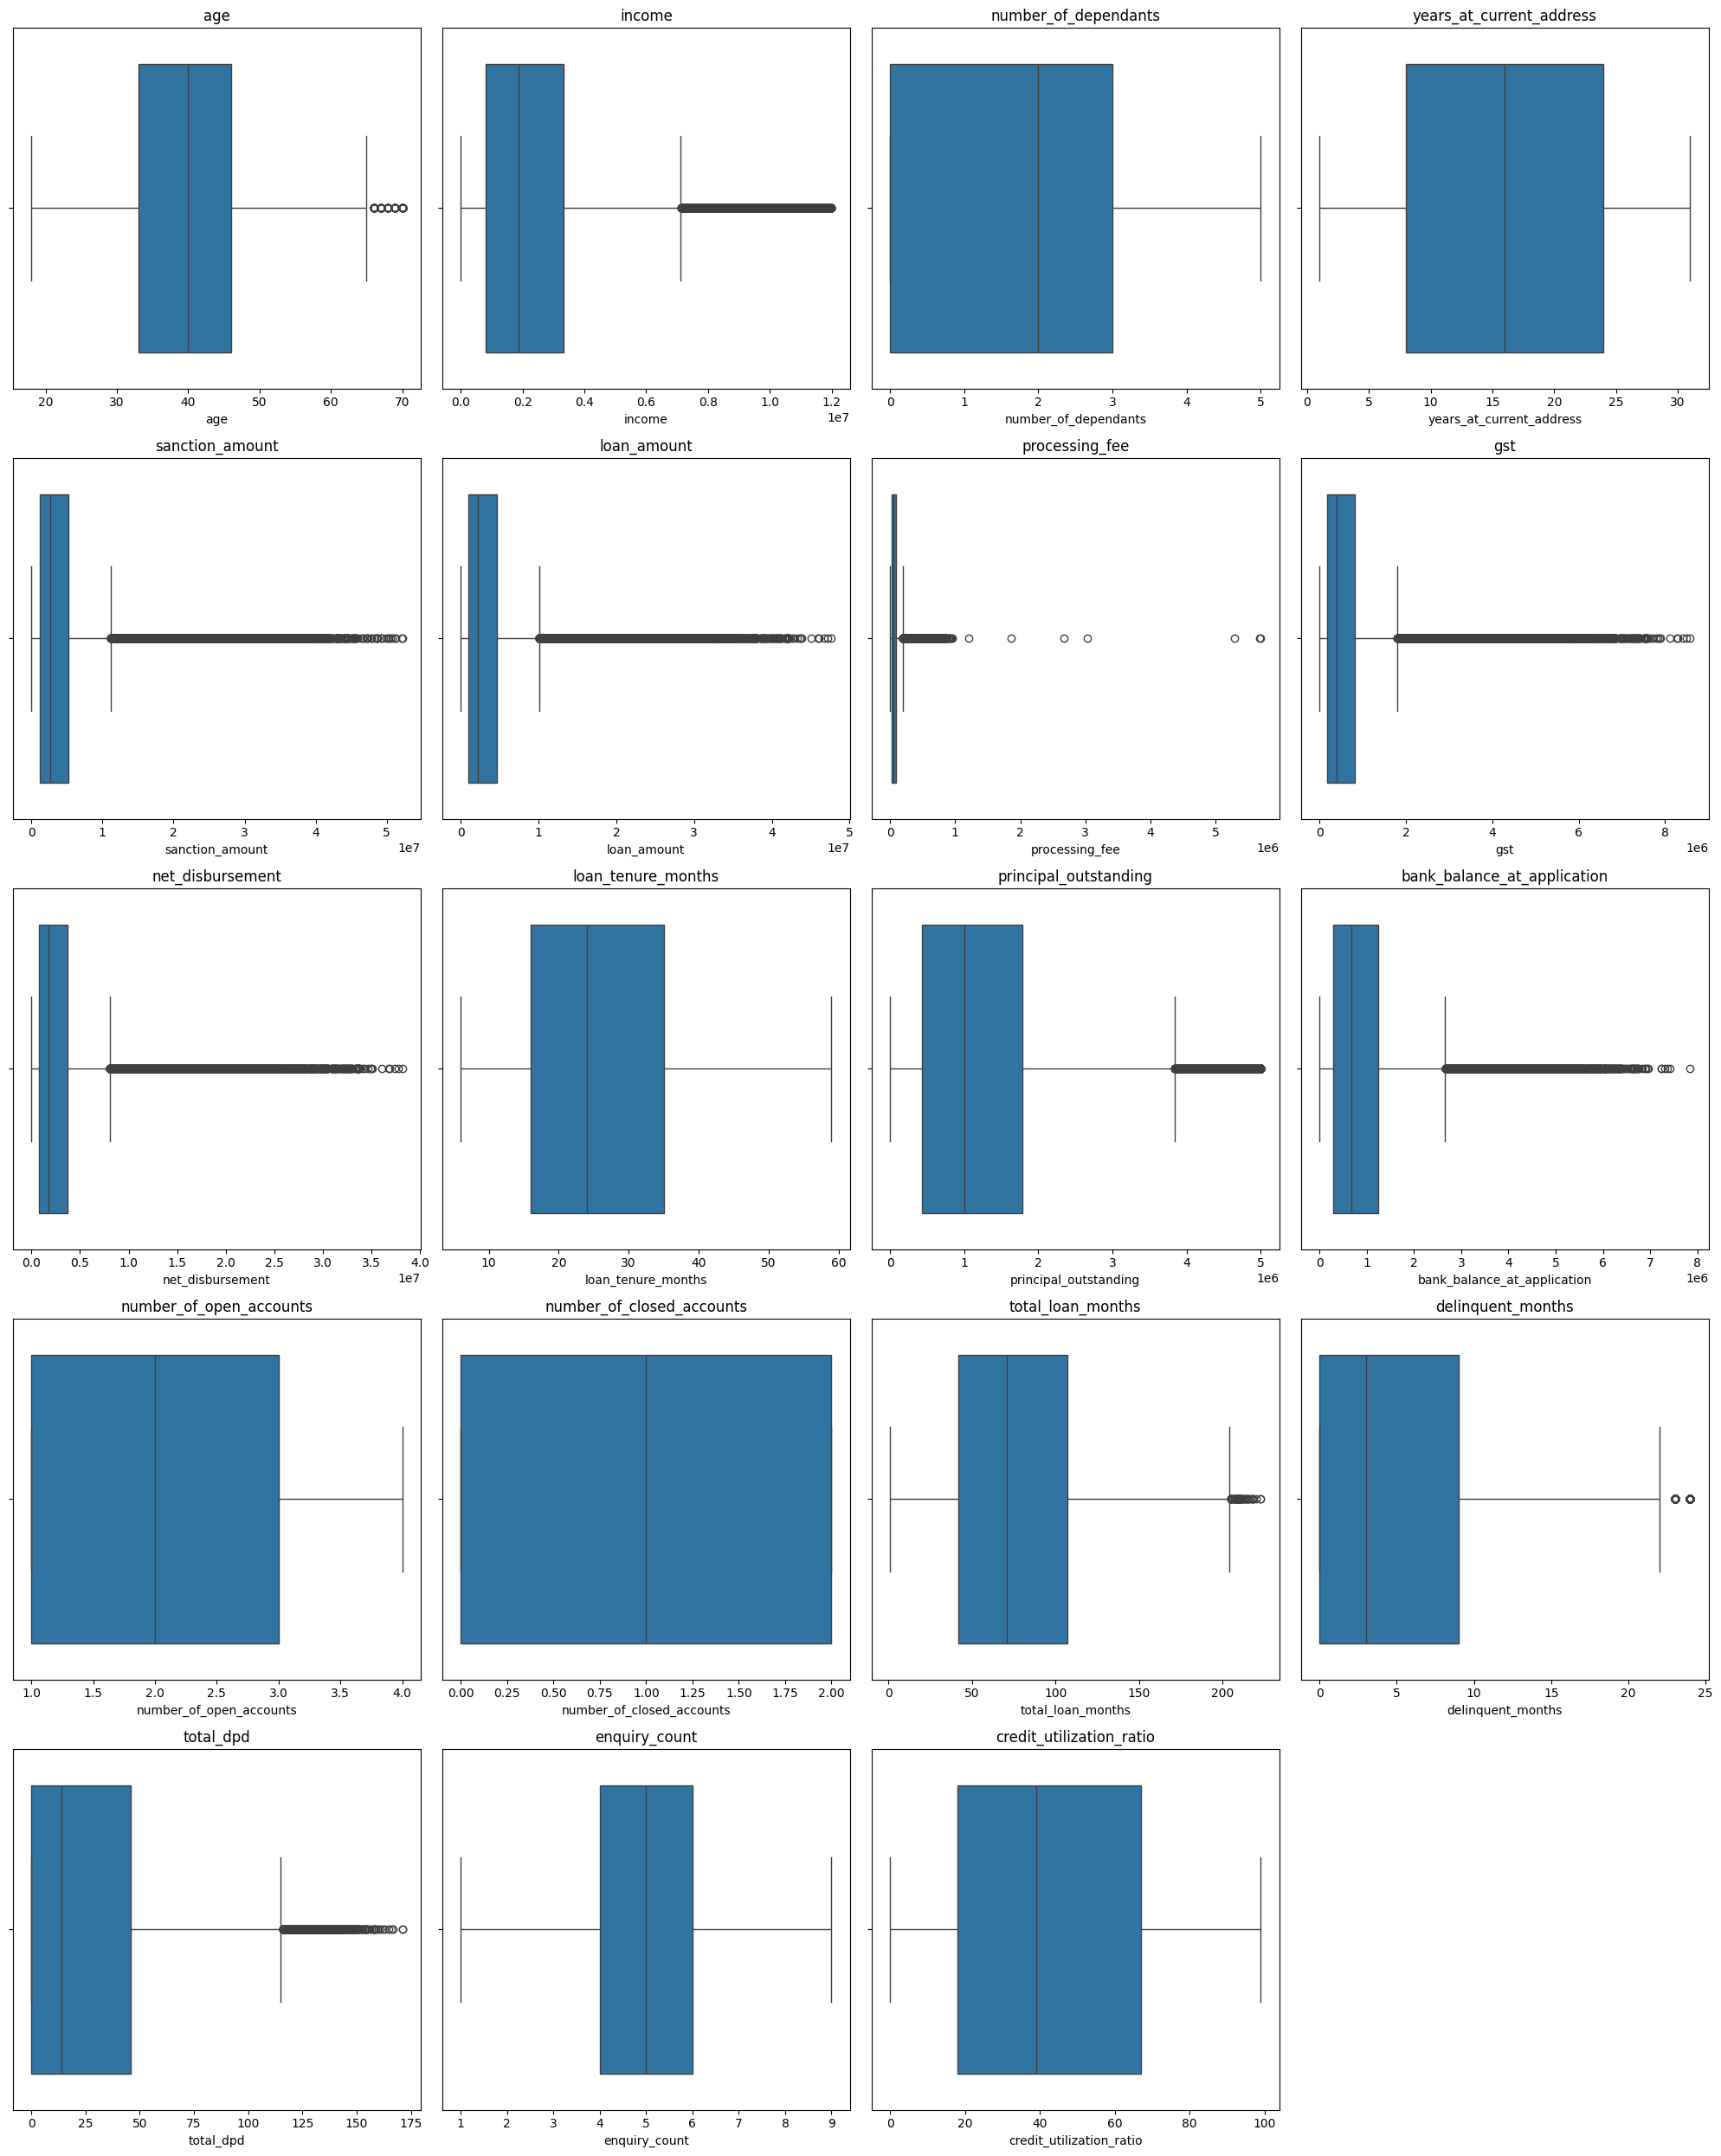

In [22]:
n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

# Set up the figure with the calculated number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration (in case n_rows > 1)
axes = axes.flatten()

# Loop through the continuous columns and plot them
for i, column in enumerate(columns_continuous):
    sns.boxplot(data=df_train, x=column, ax=axes[i])
    axes[i].set_title(column)

# Hide any remaining empty subplots (if the total number of plots isn't a multiple of 4)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

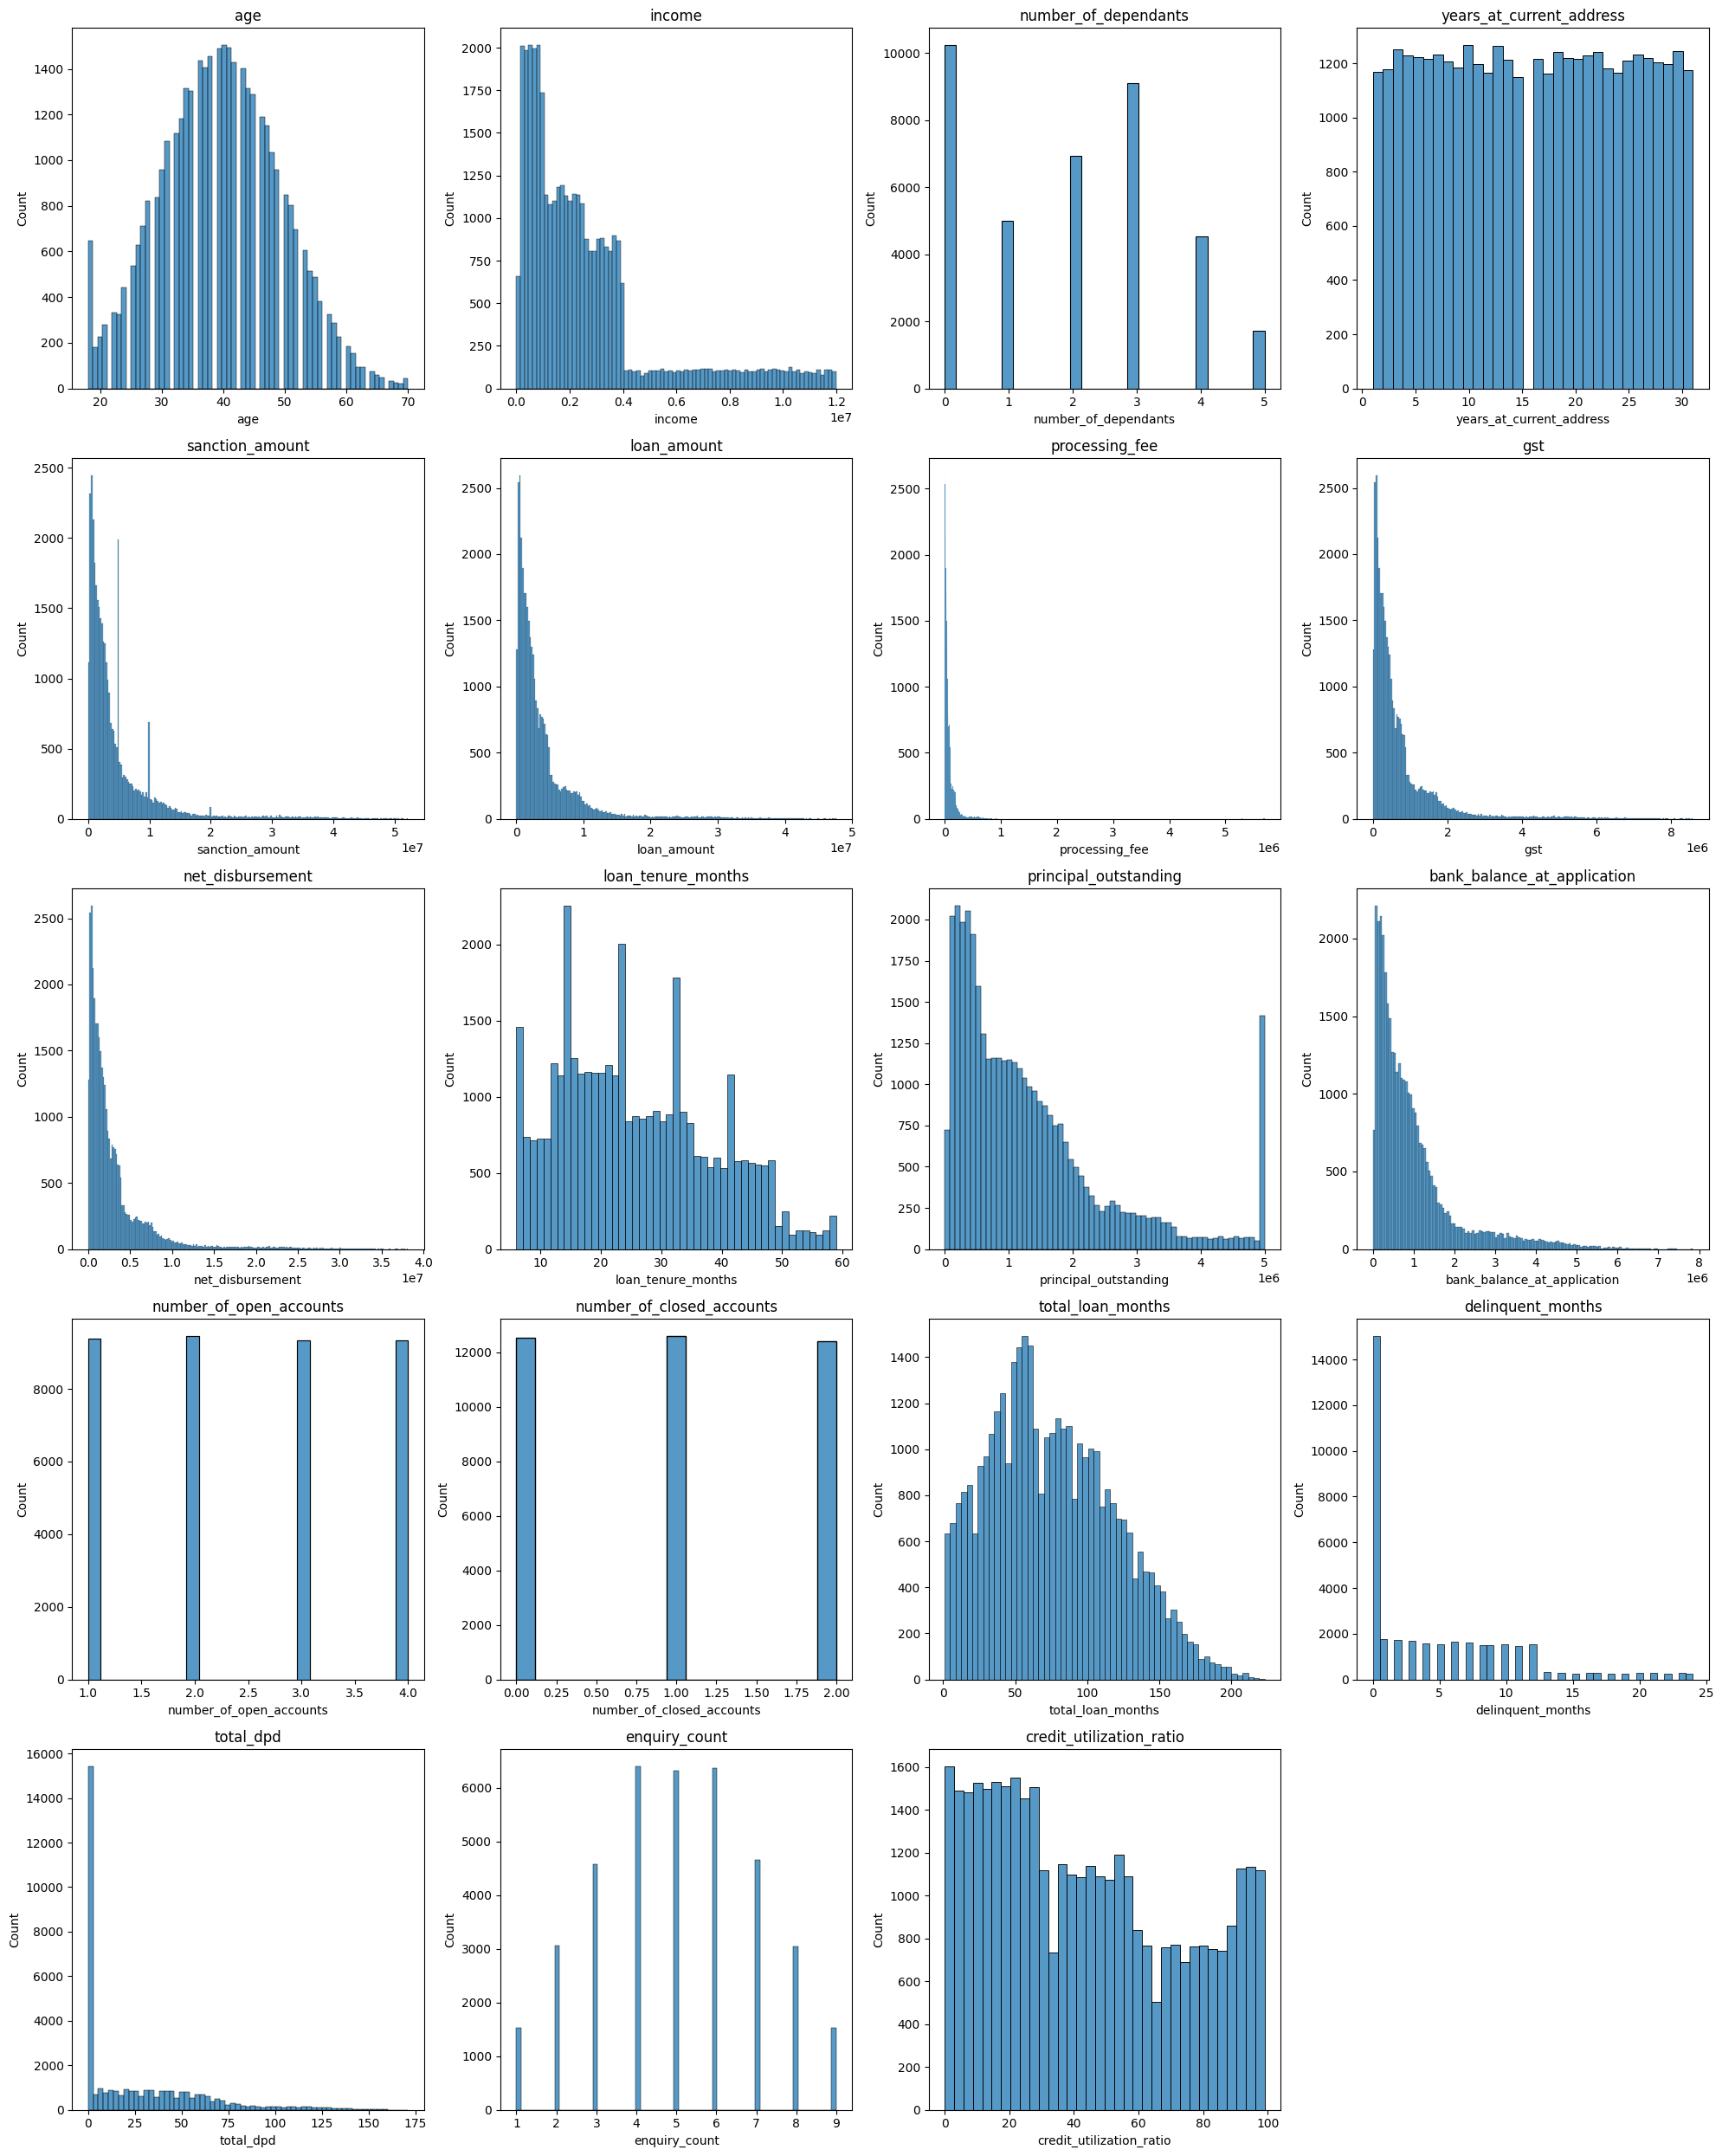

In [23]:
plt.show()
#%%
n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

# Set up the figure with the calculated number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration (in case n_rows > 1)
axes = axes.flatten()

# Loop through the continuous columns and plot them
for i, column in enumerate(columns_continuous):
    sns.histplot(data=df_train, x=column, ax=axes[i])
    axes[i].set_title(column)

# Hide any remaining empty subplots (if the total number of plots isn't a multiple of 4)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

In [24]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [25]:
df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [26]:
df_train_1 = df_train[df_train.processing_fee < df_train.loan_amount].copy()

In [27]:
df_test= df_test[df_test.processing_fee < df_test.loan_amount]
df_test.shape

(12498, 33)

In [28]:
for cols in columns_categorical:
    unique = df_train_1[cols].unique()
    print(f"{cols}==>{unique}")

gender==>['F' 'M']
marital_status==>['Single' 'Married']
employment_status==>['Salaried' 'Self-Employed']
residence_type==>['Owned' 'Mortgage' 'Rented']
city==>['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state==>['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode==>[380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose==>['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type==>['Secured' 'Unsecured']
default==>[0 1]


In [29]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace("Personaal","Personal")
df_test["loan_purpose"] = df_test["loan_purpose"].replace("Personaal","Personal")
df_train_1["loan_purpose"].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

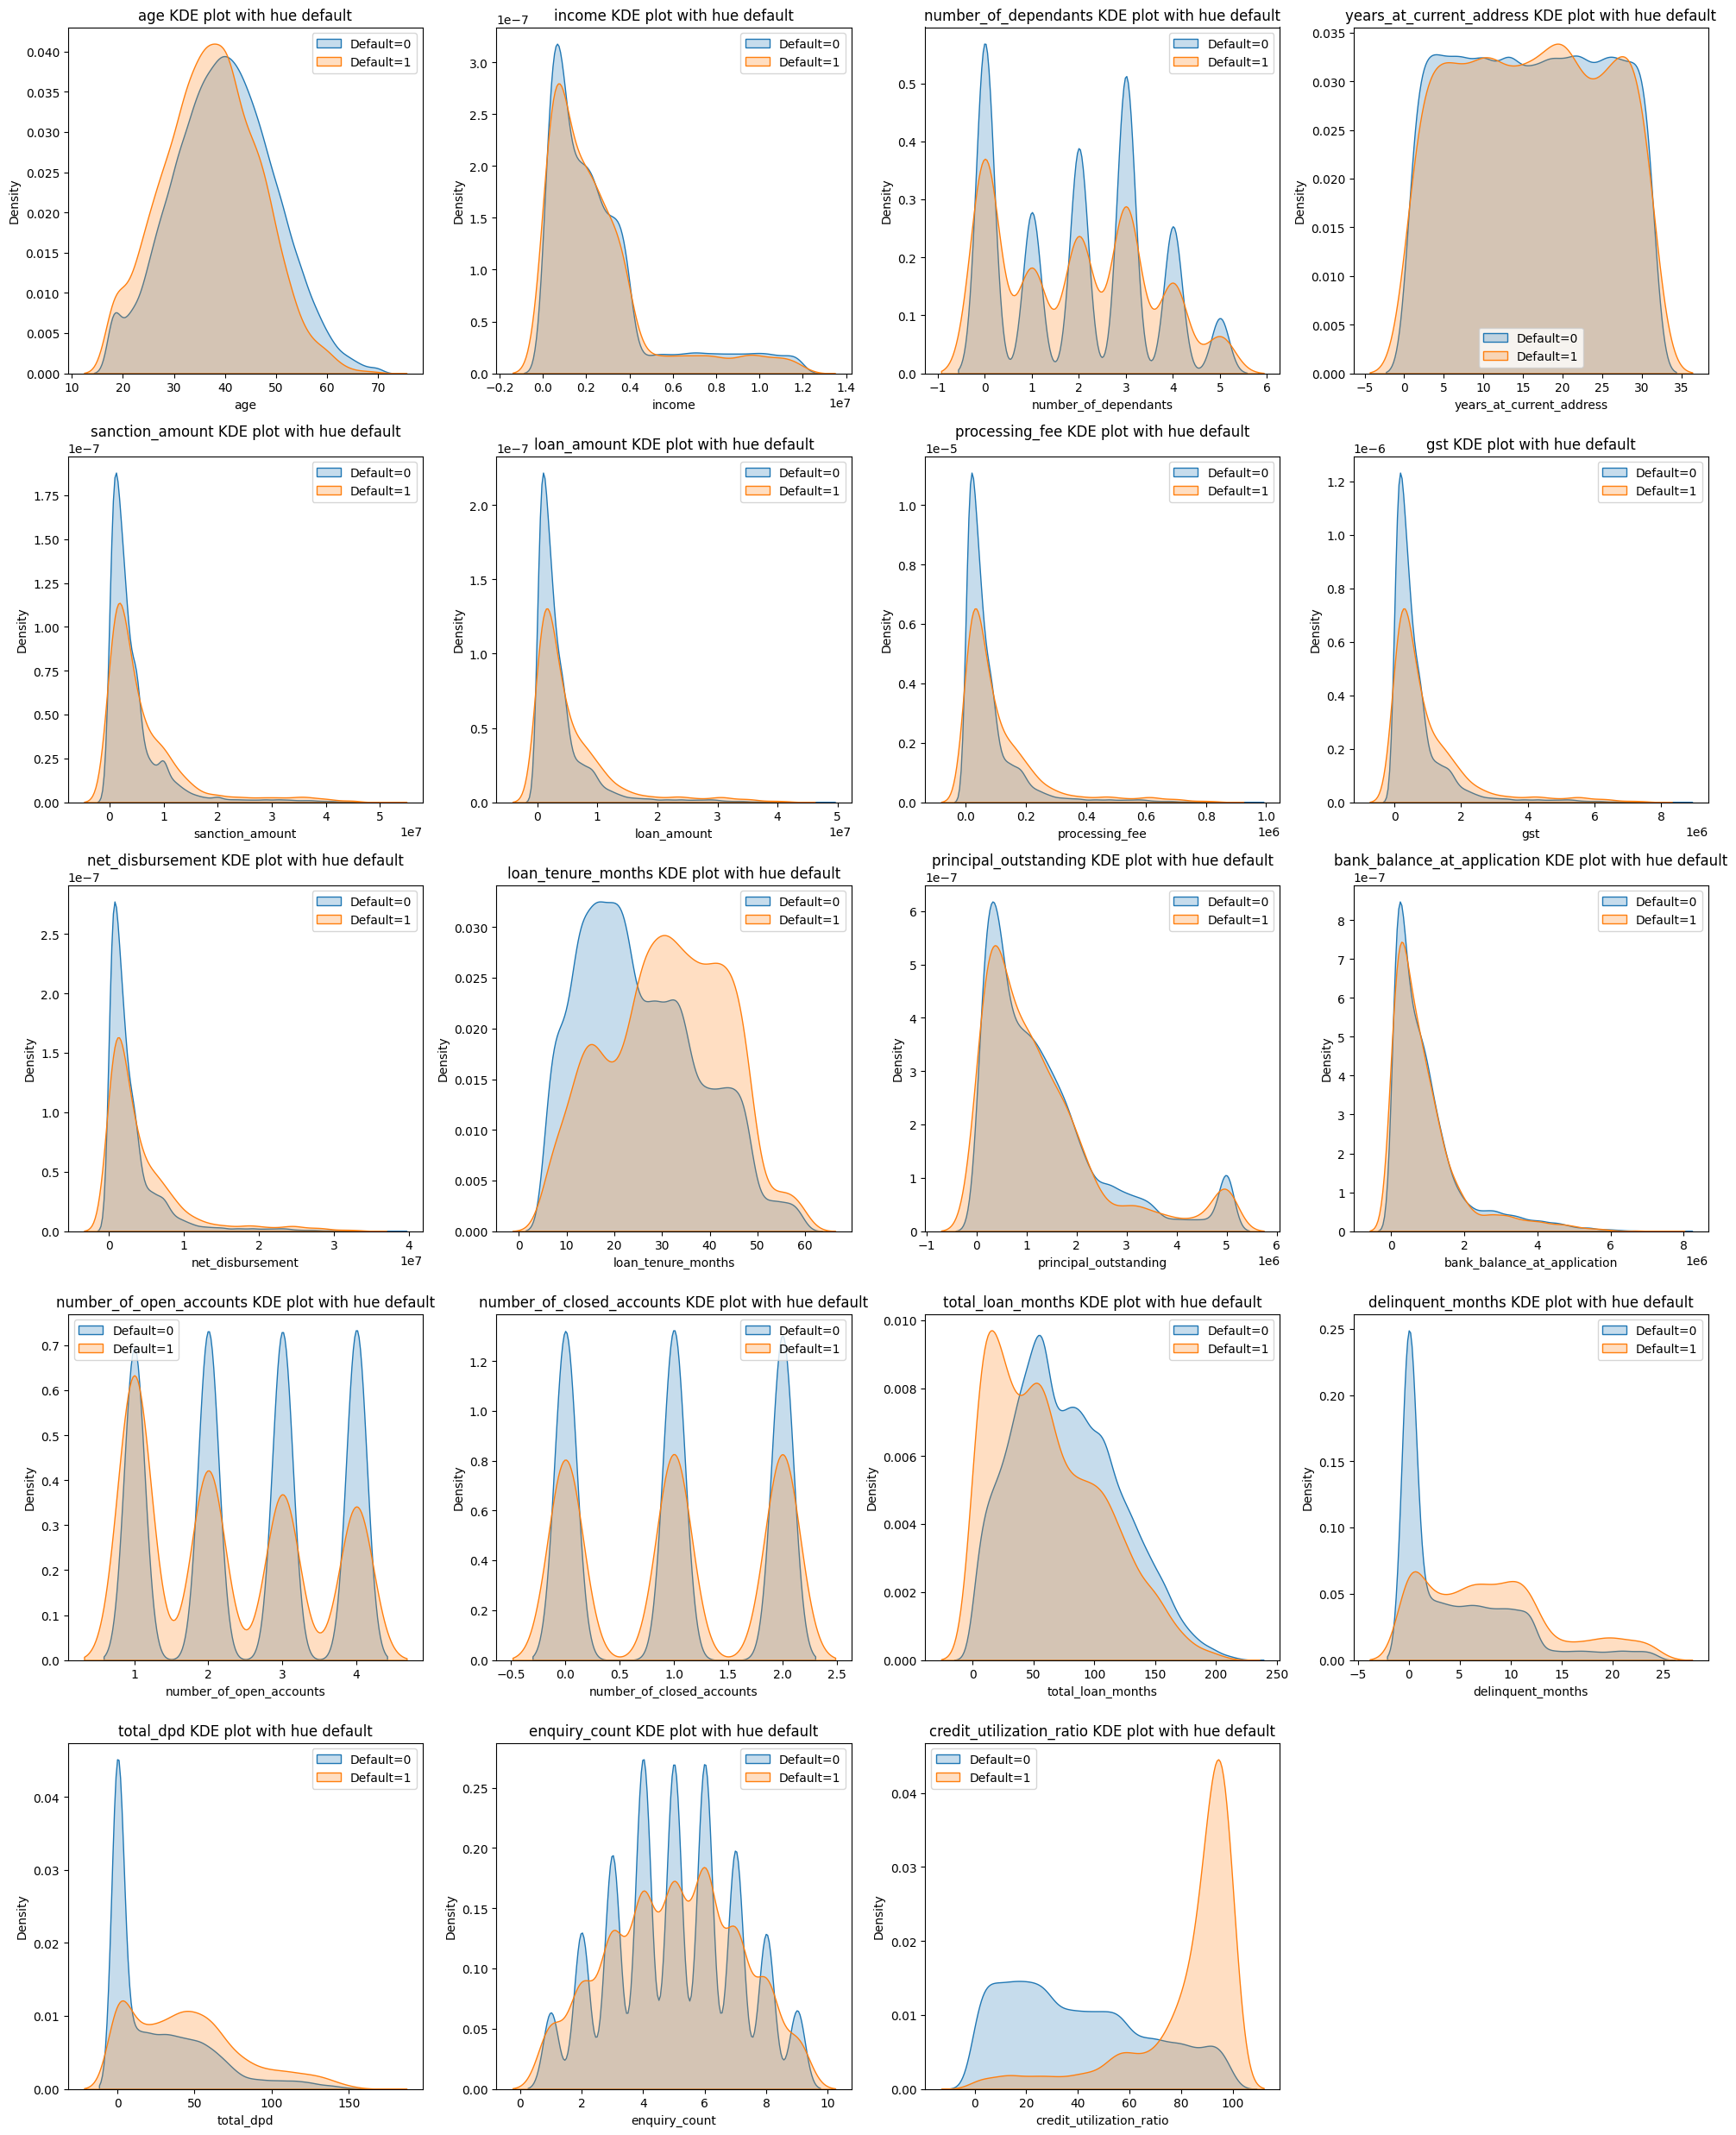

In [30]:
n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

# Set up the figure with the calculated number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the continuous columns and plot KDE for each
for i, column in enumerate(columns_continuous):
    sns.kdeplot(df_train_1[df_train_1.default == 0][column], fill=True, label="Default=0", ax=axes[i])
    sns.kdeplot(df_train_1[df_train_1.default == 1][column], fill=True, label="Default=1", ax=axes[i])
    axes[i].set_title(f"{column} KDE plot with hue default")
    axes[i].legend()

# Hide any remaining empty subplots if necessary
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

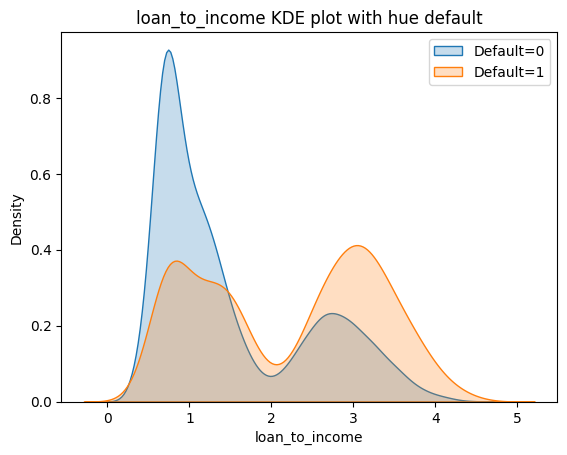

In [31]:
df_train_1["loan_to_income"] = df_train_1["loan_amount"]/df_train_1["income"]
df_test["loan_to_income"] = df_test["loan_amount"]/df_test["income"]
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"],fill=True,label="Default=1")
plt.title("loan_to_income KDE plot with hue default")
plt.legend()
plt.show()   

In [32]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

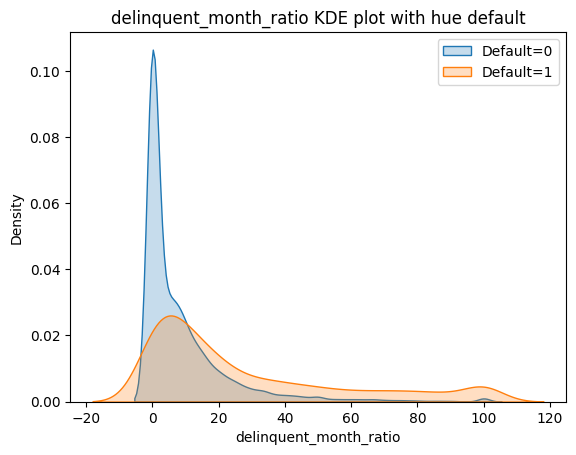

In [33]:
df_train_1["delinquent_month_ratio"] = df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"]
df_test["delinquent_month_ratio"] = df_test["delinquent_months"]*100/df_test["total_loan_months"]

sns.kdeplot(df_train_1[df_train_1.default==0]["delinquent_month_ratio"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["delinquent_month_ratio"],fill=True,label="Default=1")
plt.title("delinquent_month_ratio KDE plot with hue default")
plt.legend()
plt.show()  


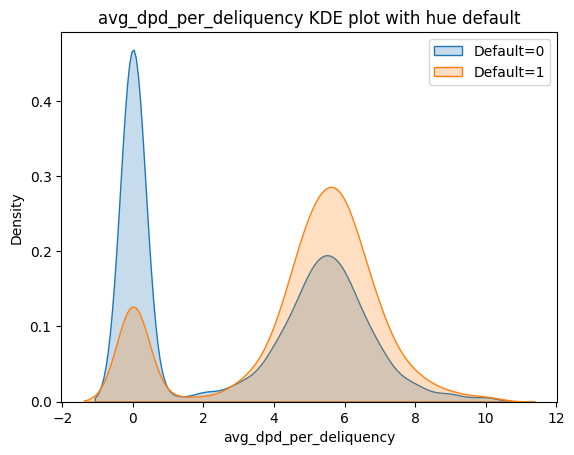

In [34]:
df_train_1["avg_dpd_per_deliquency"] = np.where(
    df_train_1["delinquent_months"]!=0,
    (df_train_1["total_dpd"]/df_train_1["delinquent_months"]),
    0
)
df_test["avg_dpd_per_deliquency"] = np.where(
    df_test["delinquent_months"]!=0,
    (df_test["total_dpd"]/df_test["delinquent_months"]),
    0
)

sns.kdeplot(df_train_1[df_train_1.default==0]["avg_dpd_per_deliquency"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["avg_dpd_per_deliquency"],fill=True,label="Default=1")
plt.title("avg_dpd_per_deliquency KDE plot with hue default")
plt.legend()
plt.show()  

In [35]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_month_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [36]:
df_train_2 = df_train_1.drop(["cust_id","loan_id"],axis=1)
df_test = df_test.drop(["cust_id","loan_id"],axis=1)

In [37]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt','loan_amount',
                              'income','total_loan_months', 'delinquent_months','total_dpd'],axis=1)

df_test = df_test.drop(['disbursal_date', 'installment_start_dt','loan_amount',
                              'income','total_loan_months', 'delinquent_months','total_dpd'],axis=1)

In [38]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [39]:
df_train_3.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_month_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [40]:
X_train = df_train_3.drop("default",axis=1)
y_train = df_train_3["default"]
X_test = df_test.drop("default",axis=1)
y_test= df_test["default"]  

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = df_train_3.select_dtypes(["int64","float64"]).columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [42]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.51,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [43]:
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.30,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.21,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.01,1.00,1.00


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Columns"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [45]:
calculate_vif(X_train[cols_to_scale])   


C:\Users\smjha\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Columns,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [46]:
features_to_drop_vif = ["sanction_amount","processing_fee","gst","net_disbursement","principal_outstanding"]

X_train_1 = X_train.drop(features_to_drop_vif,axis=1)

In [47]:
numerical_features = X_train_1.select_dtypes(["int64","float64"]).columns
numerical_features

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_month_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [48]:
vif_df = calculate_vif(X_train_1[numerical_features])
vif_df

,Columns,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [49]:
selected_numeric_features_vif = vif_df.Columns.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_month_ratio', 'avg_dpd_per_deliquency'], dtype=object)

<Axes: >

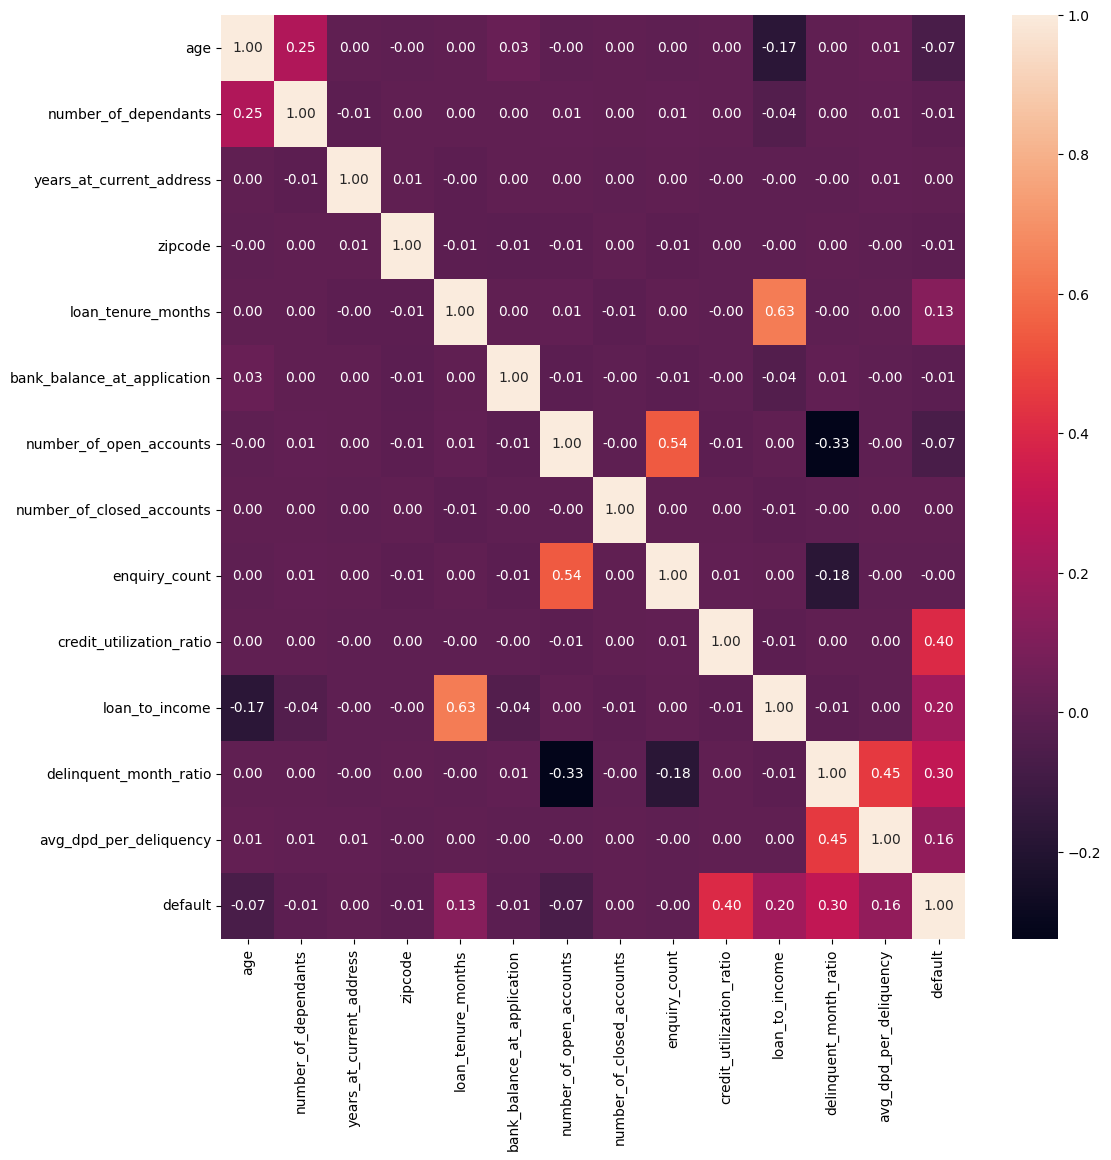

In [50]:
plt.figure(figsize=(12,12))
cm = df_train_3[numerical_features.append(pd.Index(["default"]))].corr()
sns.heatmap(cm,annot=True,fmt="0.2f")

In [69]:
def calculate_woe_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(["count","sum"])
    grouped = grouped.rename(columns={"count":"total","sum":"good"})
    grouped["bad"] = grouped["total"] - grouped["good"]
    
    total_good = grouped["good"].sum()
    total_bad = grouped["bad"].sum()
    
    grouped["good_pct"] = grouped["good"]/total_good
    grouped["bad_pct"] = grouped["bad"]/total_bad
    
    grouped["woe"] = np.log(grouped["good_pct"]/grouped["bad_pct"])
    grouped["iv"] = grouped["woe"] * (grouped["good_pct"] - grouped["bad_pct"])
    
    grouped["woe"] = grouped["woe"].replace([np.inf,-np.inf],0)
    grouped["iv"] = grouped["iv"].replace([np.inf,-np.inf],0)
    
    total_iv = grouped["iv"].sum()
    
    return grouped,total_iv



grouped,total_iv_for_loan_amt = calculate_woe_iv(pd.concat([X_train,y_train],axis=1),"loan_purpose","default")
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098,0.208,-0.746,0.082
Education,5626,546,5080,0.171,0.148,0.145,0.003
Home,11271,1744,9527,0.547,0.278,0.677,0.182
Personal,13153,585,12568,0.183,0.366,-0.692,0.127


In [52]:
total_iv_for_loan_amt

0.39377543144164784

In [53]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == "O":
        _,iv = calculate_woe_iv(pd.concat([X_train,y_train],axis=1),feature,"default")
        
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10,labels=False)
        _,iv = calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,"default")   
    iv_values[feature] = iv
iv_values

{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.0007436024782513755,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.49174039815337567,
 'delinquent_month_ratio': 0.678322540101926,
 'avg_dpd_per_deliquency': 0.42123646562822287}

In [54]:
pd.set_option("display.float_format", "{:.3f}".format)
iv_df = pd.DataFrame(list(iv_values.items()),columns=["Feature","IV"])
iv_df = iv_df.sort_values(by="IV",ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquent_month_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_deliquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [55]:
selected_features_iv = [feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_month_ratio',
 'avg_dpd_per_deliquency']

In [71]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced  = X_test[selected_features_iv]
X_test_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency
33553,0.346,Owned,Education,Secured,0.528,0.333,0.121,0.258,0.043,0.900
9427,0.288,Owned,Home,Secured,0.623,1.000,0.859,0.690,0.000,0.000
199,0.192,Owned,Home,Secured,0.623,1.000,0.727,0.637,0.000,0.000


In [57]:
X_train_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.185,0.034,0.425
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.086,0.169,0.557


In [72]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True,dtype=int)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True,dtype=int)

In [73]:
X_train_encoded.head(3) 

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,1,0,0,1,0,0
13400,0.212,0.509,0.667,0.929,0.185,0.034,0.425,1,0,0,0,0,0
883,0.615,0.245,0.333,0.838,0.086,0.169,0.557,0,0,0,0,1,1


In [74]:
X_train_encoded.head(3)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [75]:
model = LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred  = model.predict(X_test_encoded)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11580
           1       0.69      0.84      0.76       918

    accuracy                           0.96     12498
   macro avg       0.84      0.90      0.87     12498
weighted avg       0.97      0.96      0.96     12498



In [77]:
model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)
y_pred  = model.predict(X_test_encoded)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11574
           1       0.70      0.84      0.77       924

    accuracy                           0.96     12498
   macro avg       0.85      0.91      0.87     12498
weighted avg       0.97      0.96      0.96     12498



In [79]:
model = XGBClassifier()
model.fit(X_train_encoded,y_train)
y_pred  = model.predict(X_test_encoded)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11533
           1       0.72      0.83      0.77       965

    accuracy                           0.96     12498
   macro avg       0.85      0.90      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [150]:
from sklearn.model_selection import RandomizedSearchCV

log_reg = LogisticRegression(max_iter=10000,class_weight="balanced",solver = 'liblinear')

param_dist = {                            # Regularization types
    'C': np.logspace(-4, 4, 20)                  # Inverse regularization strength
}

# Step 5: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='recall',
                                   cv=3,      # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores

# Step 6: Fit the RandomizedSearchCV
random_search.fit(X_train_encoded, y_train)
lr = random_search.best_params_
# Step 7: Retrieve the best parameters and model
print("Best Parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

classification_report = classification_report(y_test, y_pred)
print(classification_report)

C:\Users\smjha\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:  {'C': 0.03359818286283781}
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     11390
           1       0.47      0.96      0.63      1108

    accuracy                           0.90     12498
   macro avg       0.73      0.93      0.78     12498
weighted avg       0.95      0.90      0.91     12498



In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

xgb = XGBClassifier(eval_metric='mlogloss')

# Step 4: Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

# Step 5: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Number of random combinations to try
                                   scoring='f1',
                                   cv=3,      # 5-fold cross-validation
                                   verbose=1, # Increase output verbosity
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores
# Step 6: Fit the RandomizedSearchCV
random_search.fit(X_train_encoded, y_train)
xgb_= random_search.best_params_
# Step 7: Retrieve the best parameters and model
print("Best Parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_encoded)


classification_rep = classification_report(y_test, y_pred_xgb)
print(classification_rep)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters:  {'subsample': 0.7, 'reg_lambda': 0.1668100537200059, 'reg_alpha': 0.007742636826811269, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.046415888336127774, 'gamma': 0.2, 'colsample_bytree': 0.9}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.72      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



### Under Sampling

In [117]:
y_train.value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [141]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

rus = RandomUnderSampler(random_state=42)

X_train_rus,y_train_rus = rus.fit_resample(X_train_encoded,y_train)

y_train_rus.value_counts()


default
0    3189
1    3189
Name: count, dtype: int64

In [142]:
model = XGBClassifier(**xgb_)
model.fit(X_train_rus, y_train_rus)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.59      0.96      0.73      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.95      0.85     12498
weighted avg       0.96      0.94      0.94     12498



In [143]:
model = LogisticRegression(**lr)
model.fit(X_train_rus, y_train_rus)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Print the classification report
print(classification_report(y_test, y_pred))  # Correct order: y_test (true labels), y_pred (predicted labels)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     11390
           1       0.45      0.95      0.61      1108

    accuracy                           0.89     12498
   macro avg       0.72      0.92      0.77     12498
weighted avg       0.95      0.89      0.91     12498



In [144]:
from imblearn.combine import SMOTETomek

smoke = SMOTETomek(random_state=42)
X_train_over,y_train_over = smoke.fit_resample(X_train_encoded,y_train)
y_train_over.value_counts()

default
0    34226
1    34226
Name: count, dtype: int64

In [145]:
model = XGBClassifier(**xgb_)
model.fit(X_train_over,y_train_over)
y_pred  = model.predict(X_test_encoded)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10913
           1       0.93      0.65      0.77      1585

    accuracy                           0.95     12498
   macro avg       0.94      0.82      0.87     12498
weighted avg       0.95      0.95      0.95     12498



In [149]:
model = LogisticRegression(**lr)
model.fit(X_train_over,y_train_over)
y_pred  = model.predict(X_test_encoded)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10446
           1       0.95      0.51      0.67      2052

    accuracy                           0.92     12498
   macro avg       0.93      0.75      0.81     12498
weighted avg       0.92      0.92      0.90     12498



In [153]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

c:\Users\smjha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [156]:
def objective(trial):
    param_dist = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param_dist, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_over, y_train_over, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2024-09-21 11:44:34,027] A new study created in memory with name: no-name-569bdf48-98bb-4f1f-81ad-f4b19cba8a16
[I 2024-09-21 11:44:34,170] Trial 0 finished with value: 0.9194250250674187 and parameters: {'C': 0.0035402428213579707, 'solver': 'lbfgs', 'tol': 0.00040792332601410913, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9194250250674187.
[I 2024-09-21 11:44:34,394] Trial 1 finished with value: 0.8407485182249084 and parameters: {'C': 0.00018044583389303643, 'solver': 'newton-cg', 'tol': 2.2572231610509344e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9194250250674187.
[I 2024-09-21 11:44:34,611] Trial 2 finished with value: 0.9211848843277871 and parameters: {'C': 0.00413235086707259, 'solver': 'newton-cg', 'tol': 4.110978686748979e-05, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9211848843277871.
[I 2024-09-21 11:44:34,724] Trial 3 finished with value: 0.9243587653385422 and parameters: {'C': 10.734955171919935, 'solver': 'lbfgs',

In [159]:
from sklearn.metrics import classification_report
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_over, y_train_over)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449100720566838
  Params: 
    C: 6.875695430327482
    solver: liblinear
    tol: 0.0012053741011637331
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [160]:
def objective(trial):
    param_dist = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param_dist)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_over, y_train_over, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2024-09-21 11:46:46,102] A new study created in memory with name: no-name-0c91ebba-4184-492f-a3a2-6c1aadf7b2eb
[I 2024-09-21 11:46:47,260] Trial 0 finished with value: 0.956860632633273 and parameters: {'lambda': 2.0674587943378384, 'alpha': 0.07568575561396133, 'subsample': 0.9998389802702226, 'colsample_bytree': 0.4597518302328768, 'max_depth': 6, 'eta': 0.25497438777801706, 'gamma': 9.348721805689612, 'scale_pos_weight': 7.01448088043195, 'min_child_weight': 10, 'max_delta_step': 2}. Best is trial 0 with value: 0.956860632633273.
[I 2024-09-21 11:46:48,395] Trial 1 finished with value: 0.9348548816553213 and parameters: {'lambda': 0.04045083065420702, 'alpha': 0.00264799483505336, 'subsample': 0.8057193806333103, 'colsample_bytree': 0.652051077601837, 'max_depth': 5, 'eta': 0.07704790462451826, 'gamma': 6.787717014234865, 'scale_pos_weight': 9.480798253200565, 'min_child_weight': 3, 'max_delta_step': 4}. Best is trial 0 with value: 0.956860632633273.
[I 2024-09-21 11:46:49,557] T

In [162]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_over, y_train_over)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9760492170314352
  Params: 
    lambda: 1.9017106743985102
    alpha: 0.12166865144695267
    subsample: 0.9315391679007821
    colsample_bytree: 0.8467986412915242
    max_depth: 8
    eta: 0.27198235210572885
    gamma: 0.12746873503184003
    scale_pos_weight: 2.722174958462794
    min_child_weight: 2
    max_delta_step: 3
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.71      0.86      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.91      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [163]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [169]:
from sklearn.metrics import roc_curve,auc

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

array([0.00000671, 0.76487095, 0.14267966, ..., 0.00000388, 0.0000023 ,
       0.07420971])

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.       , 0.       , 0.       , 0.0000878, 0.0000878]),
 array([0.        , 0.00090253, 0.21028881, 0.21028881, 0.22563177]),
 array([       inf, 0.99999993, 0.99869309, 0.9986893 , 0.99843804]))

In [173]:
area = auc(fpr,tpr)
area

0.9829846308909899

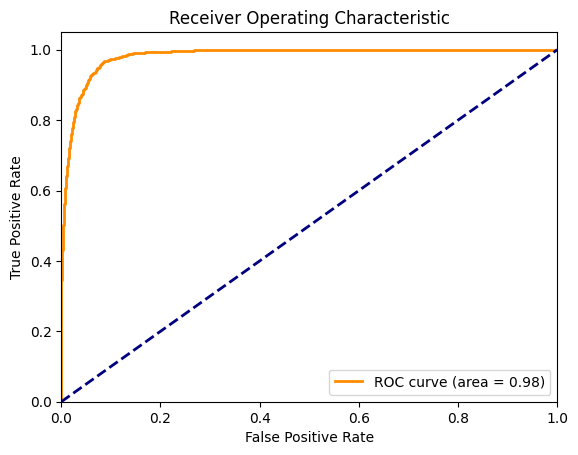

In [174]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [184]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
df_eval = pd.DataFrame({
    "Default Truth" : y_test,
    "Default_Probability" : probabilities
})

df_eval.head(2)

,Default Truth,Default_Probability
33553,0,0.000
9427,0,0.765


In [185]:
df_eval["Decile"] = pd.qcut(df_eval["Default_Probability"],q=10,duplicates="drop",labels=False)
df_eval.head(2)

,Default Truth,Default_Probability,Decile
33553,0,0.000,1
9427,0,0.765,8


In [187]:
df_eval[df_eval.Decile==8]['Default_Probability'].describe()

count   1250.000
mean       0.495
std        0.184
min        0.212
25%        0.330
50%        0.480
75%        0.660
max        0.819
Name: Default_Probability, dtype: float64

In [190]:
df_decile = df_eval.groupby("Decile").apply(lambda x: pd.Series({
    'Minimum Probability': x['Default_Probability'].min(),
    'Maximum Probability': x['Default_Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\smjha\AppData\Local\Temp\ipykernel_19352\3492267654.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby("Decile").apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.006,1.000,1249.000
6,6,0.006,0.034,2.000,1247.000
7,7,0.034,0.211,17.000,1233.000
8,8,0.212,0.819,170.000,1080.000
9,9,0.819,1.000,918.000,332.000


In [191]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.006,1.000,1249.000,0.080,99.920
6,6,0.006,0.034,2.000,1247.000,0.160,99.840
7,7,0.034,0.211,17.000,1233.000,1.360,98.640
8,8,0.212,0.819,170.000,1080.000,13.600,86.400
9,9,0.819,1.000,918.000,332.000,73.440,26.560


In [192]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.819,1.000,918.000,332.000,73.440,26.560
1,8,0.212,0.819,170.000,1080.000,13.600,86.400
2,7,0.034,0.211,17.000,1233.000,1.360,98.640
3,6,0.006,0.034,2.000,1247.000,0.160,99.840
4,5,0.001,0.006,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [193]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.819,1.000,918.000,332.000,73.440,26.560,918.000,332.000
1,8,0.212,0.819,170.000,1080.000,13.600,86.400,1088.000,1412.000
2,7,0.034,0.211,17.000,1233.000,1.360,98.640,1105.000,2645.000
3,6,0.006,0.034,2.000,1247.000,0.160,99.840,1107.000,3892.000
4,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [194]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.819,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915
1,8,0.212,0.819,170.000,1080.000,13.600,86.400,1088.000,1412.000,98.195,12.397
2,7,0.034,0.211,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222
3,6,0.006,0.034,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
4,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [195]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.819,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915,79.937
1,8,0.212,0.819,170.000,1080.000,13.600,86.400,1088.000,1412.000,98.195,12.397,85.798
2,7,0.034,0.211,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222,76.507
3,6,0.006,0.034,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
4,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)



In [197]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9829846308909899
Gini Coefficient: 0.9659692617819797


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

In [205]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]
feature_importance

array([ 0.10444186,  0.77628824,  1.01667314, 15.56041313, 17.41219264,
       13.22253556,  1.90119142, -1.83940829,  1.84716437,  0.8988115 ,
       -3.46723466,  1.10247235,  1.10247235])

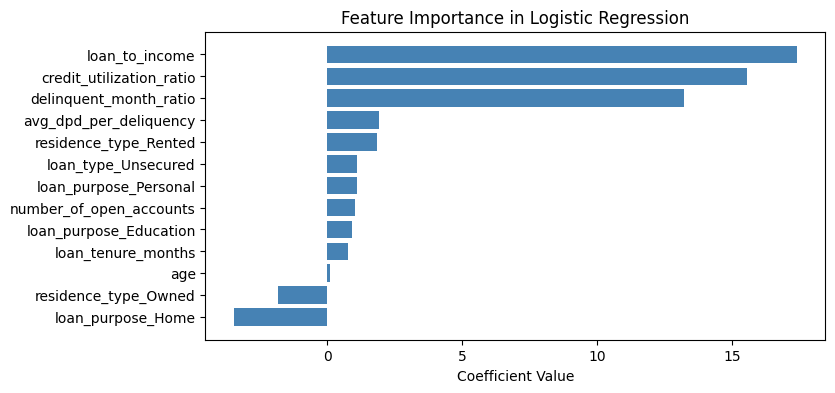

In [206]:
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [207]:
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_month_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,1,0,1,0,0,0
9427,0.288,0.623,1.000,0.859,0.690,0.000,0.000,1,0,0,1,0,0
199,0.192,0.623,1.000,0.727,0.637,0.000,0.000,1,0,0,1,0,0


In [208]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_month_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [209]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_month_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [213]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_month_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [214]:
from joblib import dump

model_data = {
    "model":final_model,
    "features" : X_test_encoded.columns,
    "scaler" : scaler,
    "cols_to_scale" : cols_to_scale
}

dump(model_data,"artifacts/model_data.joblib")

['artifacts/model_data.joblib']

In [215]:
final_model.coef_

array([[ 0.10444186,  0.77628824,  1.01667314, 15.56041313, 17.41219264,
        13.22253556,  1.90119142, -1.83940829,  1.84716437,  0.8988115 ,
        -3.46723466,  1.10247235,  1.10247235]])

In [216]:
final_model.intercept_

array([-20.41240174])